# why good initiatlization

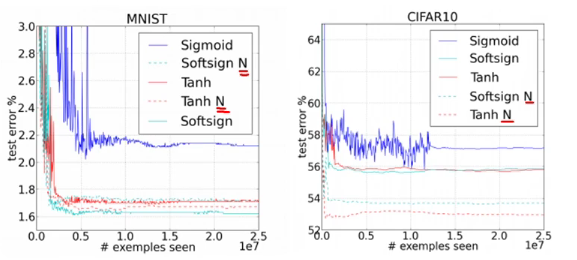

# Restricted Boltzmann Machine

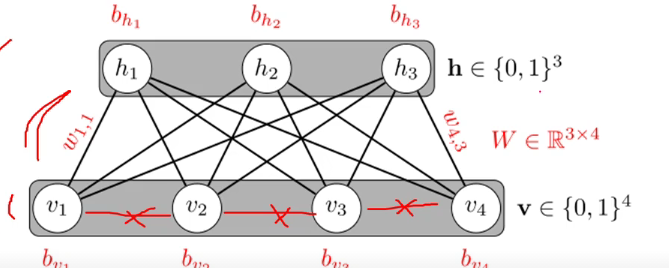

# Deep Belief Network

 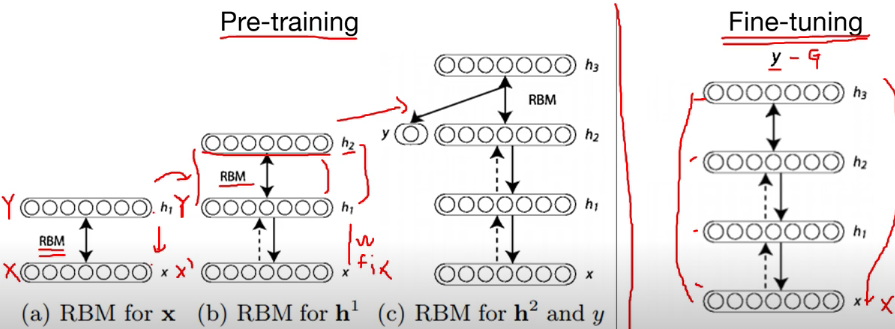


In [2]:
# Pre-training
한층씩 RBM을 쌓아가면서 W를 fix 
RBM X - Y 후 Y - X'으로 back propagation 시킴 
이후 w를 고정 시킨후 다시 위의 layer의 RBM을 학습시켜 스택을 쌓는다.





# Fine-tuning 
한번에 RBM으로 만든  W를 back propragation

# Xavier / He initialization

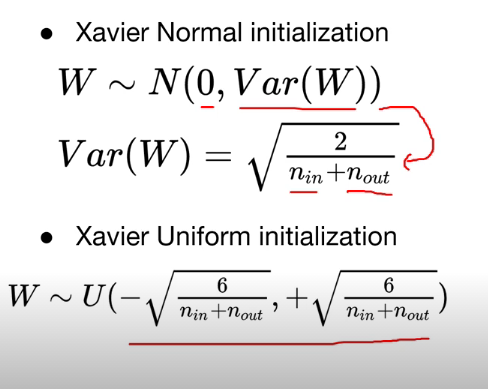

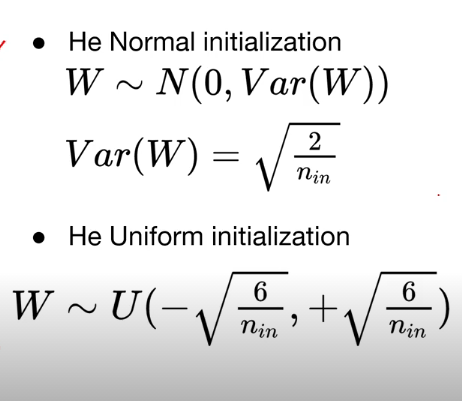

분모에 in,out인자의 차이 

# Code: mnist_nn_xavier

In [8]:
def xavier_uniform(tensor,gain=1):
    fan_in, fan_out = _calculate_fan_in_and_fan_out(tensor)
    std = gain * math.sprt(2.0/(fan_in + fan_out))
    a =  math.sqrt(3.0) * std
    with torch.no_grad():
        return tensor.uniform_(-a,a)

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(111)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [9]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [10]:

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [11]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

C:\ProgramData\Miniconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [12]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [13]:
# nn layers
linear1 = torch.nn.Linear(784, 256, bias=True)
linear2 = torch.nn.Linear(256, 256, bias=True)
linear3 = torch.nn.Linear(256, 10, bias=True)
relu = torch.nn.ReLU()

In [18]:
# Initialization
torch.nn.init.xavier_uniform(linear1.weight)
torch.nn.init.xavier_uniform(linear2.weight)
torch.nn.init.xavier_uniform(linear3.weight)

<ipython-input-18-b06dafee3b15>:2: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(linear1.weight)
<ipython-input-18-b06dafee3b15>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(linear2.weight)
<ipython-input-18-b06dafee3b15>:4: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(linear3.weight)


Parameter containing:
tensor([[ 0.1101, -0.0059,  0.0974,  ..., -0.1309, -0.0444, -0.0906],
        [ 0.0623, -0.0760,  0.0825,  ...,  0.0406,  0.0992, -0.0287],
        [-0.1021,  0.0184, -0.1096,  ...,  0.0824,  0.0051,  0.0413],
        ...,
        [-0.0702,  0.0327, -0.1445,  ..., -0.1347,  0.1163,  0.0199],
        [ 0.1334,  0.0697,  0.1194,  ..., -0.1304, -0.1447, -0.0259],
        [-0.0193,  0.1040,  0.0285,  ...,  0.0100, -0.0127, -0.0904]],
       requires_grad=True)

In [19]:
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

In [20]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [21]:

total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.241788670
Epoch: 0002 cost = 0.093788214
Epoch: 0003 cost = 0.059997469
Epoch: 0004 cost = 0.043201473
Epoch: 0005 cost = 0.033890247
Epoch: 0006 cost = 0.025621321
Epoch: 0007 cost = 0.018858748
Epoch: 0008 cost = 0.018444456
Epoch: 0009 cost = 0.014831753
Epoch: 0010 cost = 0.017759711
Epoch: 0011 cost = 0.009147680
Epoch: 0012 cost = 0.012623779
Epoch: 0013 cost = 0.011979389
Epoch: 0014 cost = 0.010363786
Epoch: 0015 cost = 0.007845001
Learning finished


In [28]:
linear1 = torch.nn.Linear(784, 512, bias=True)
linear2 = torch.nn.Linear(512, 512, bias=True)
linear3 = torch.nn.Linear(512,512, bias=True)
linear4 = torch.nn.Linear(512, 512, bias=True)
linear5 = torch.nn.Linear(512, 10, bias=True)
relu = torch.nn.ReLU()

In [32]:
torch.nn.init.xavier_uniform(linear1.weight)
torch.nn.init.xavier_uniform(linear2.weight)
torch.nn.init.xavier_uniform(linear3.weight)
torch.nn.init.xavier_uniform(linear4.weight)
torch.nn.init.xavier_uniform(linear5.weight)

<ipython-input-32-014ee2a66e20>:1: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(linear1.weight)
<ipython-input-32-014ee2a66e20>:2: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(linear2.weight)
<ipython-input-32-014ee2a66e20>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(linear3.weight)
<ipython-input-32-014ee2a66e20>:4: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(linear4.weight)
<ipython-input-32-014ee2a66e20>:5: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(linear5.weight)


Parameter containing:
tensor([[ 0.0705, -0.0407, -0.0435,  ...,  0.0432,  0.0255, -0.0845],
        [-0.0504,  0.0161,  0.0533,  ...,  0.0053, -0.0748, -0.0268],
        [ 0.0962,  0.0442, -0.0116,  ..., -0.0789, -0.0560,  0.0336],
        ...,
        [-0.0049,  0.0329, -0.0908,  ...,  0.0247, -0.0953,  0.0768],
        [-0.0787, -0.0590,  0.0576,  ...,  0.0154, -0.0975, -0.0574],
        [ 0.0003, -0.0553, -0.0659,  ...,  0.0520, -0.0548, -0.0841]],
       requires_grad=True)

In [29]:
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3,linear4,relu,linear5).to(device)

In [30]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [31]:

total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.255765915
Epoch: 0002 cost = 0.101428680
Epoch: 0003 cost = 0.069344327
Epoch: 0004 cost = 0.056466918
Epoch: 0005 cost = 0.046756964
Epoch: 0006 cost = 0.036310524
Epoch: 0007 cost = 0.030802982
Epoch: 0008 cost = 0.034500696
Epoch: 0009 cost = 0.025258863
Epoch: 0010 cost = 0.024573017
Epoch: 0011 cost = 0.020106813
Epoch: 0012 cost = 0.018996505
Epoch: 0013 cost = 0.020067250
Epoch: 0014 cost = 0.017095480
Epoch: 0015 cost = 0.017045818
Learning finished
